In [1]:
import time
import os 
import numpy as np
import csv
import ast
import sys
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
import pickle
import pandas as pd
import time

%reload_ext autoreload
%autoreload 2

In [2]:
from draw import draw_geom_line,easy_draw,data_root

dr = data_root()+ 'mesh_data_modified.npy'

d1 = np.load(dr)
print(d1.shape)
mean_mesh = np.mean(d1,0)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
(44467, 18, 68, 3)


# 普通FFD的展示

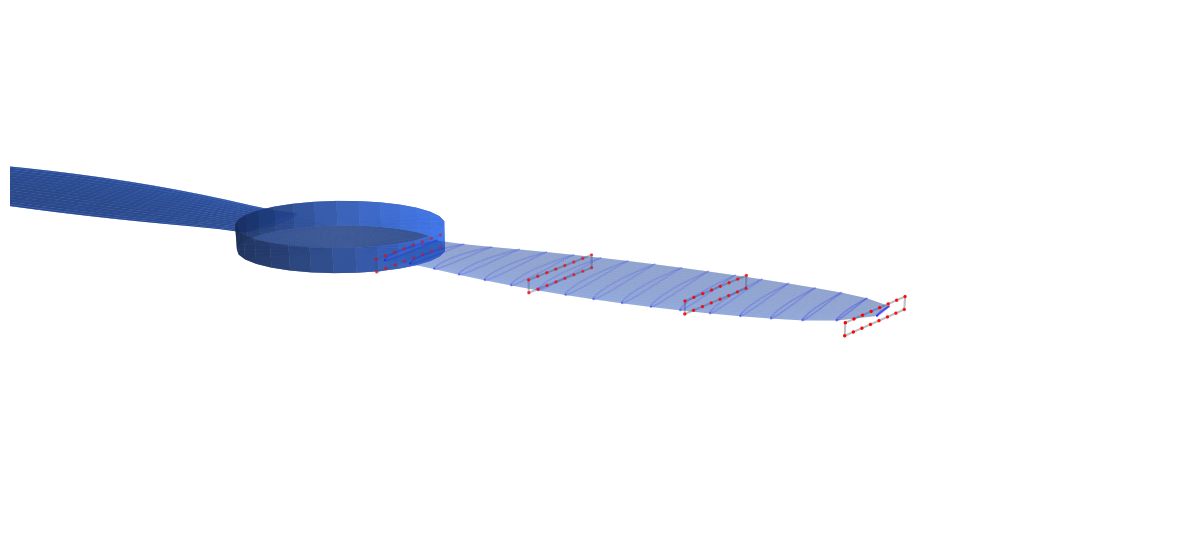

(64, 3)


In [3]:
from draw import draw_ffd

name = 'test_ffd'
path = 'pic'
point = draw_ffd(mean_mesh,name,path)
print(point.shape)

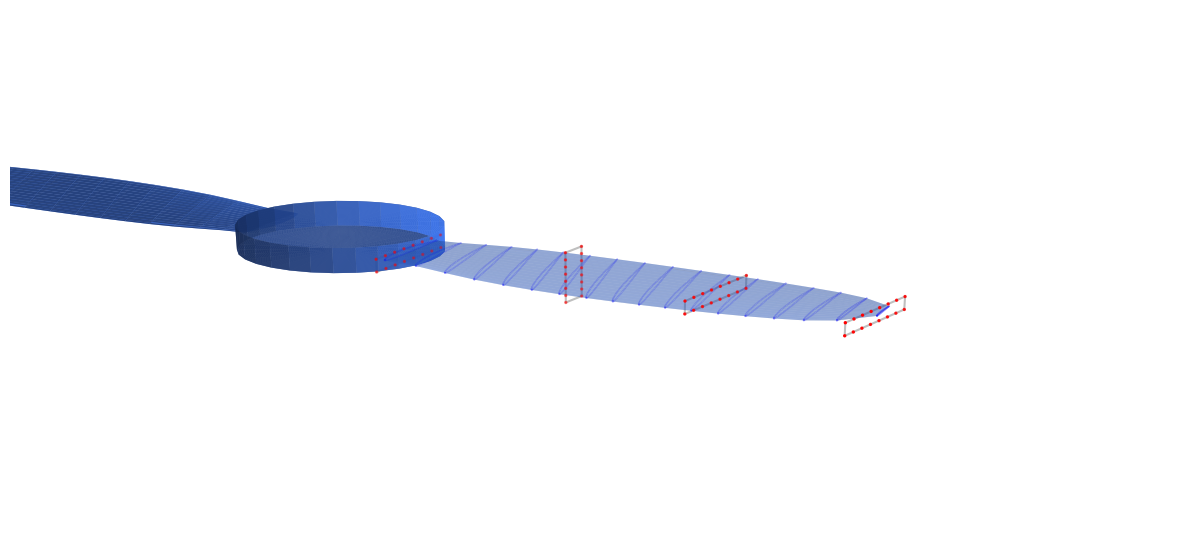

In [5]:
from ffd_pca import ffd_transform2,draw_plot_point

twist_foil1,twist_points = ffd_transform2(mean_mesh,(3,7,1),- np.pi/2)

a = draw_ffd(twist_foil1,name,path,twist_points.reshape(-1,3))

In [4]:
from draw import draw_section
sec_po = [0.2,0.35,0.5,0.65,0.8]
base_mesh = mean_mesh.reshape(-1,3)
p = draw_section(base_mesh,sec_po,'base','pic',-15,20,False,0.2,False)
p = draw_section(base_mesh,sec_po,'base_face','pic',0,0,True,0.5)

## 变形后展示

In [6]:

import ffd_pca  
from ffd_pca import ffd_transform as f_t

mesh,point = f_t(mean_mesh,(3,7,1),0.0)
mesh = mesh.reshape(-1,68,3)

In [7]:
ffd_pca.draw_mesh_point(mesh,point)

In [ ]:
path = 'pic/FFD_foils/'

for i in range(100):
    name  = 'point_'+str(i)
    name1 = 'sec_' + str(i)
    name2 = 'vari_' + str(i)

    mesh,point = f_t(mean_mesh,(3,7,1),0.01)
    ffd_pca.draw_mesh_point(mesh,point,name,path)
    mesh = mesh.reshape(-1,3)
    p = draw_section(mesh,sec_po,name1,path,-15,20,False,0.2,False)
    p = draw_section(mesh,sec_po,name2,path,0,0,True,0.5)

In [ ]:
from pyDOE import lhs
BATCH_SIZE = 100
a = np.array(lhs(1,10) * BATCH_SIZE,dtype=int)[:,0]
a = a.reshape((2,5))
print(a)

import matplotlib.image as img
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,6))

for i in range(5):
    for j in range(2):
        posi = j + i * 2 + 1
      
        ax = fig.add_subplot(2,5,posi)
        
        ax.axis('off')
        name = 'pic/FFD_foils/point_' + str(a[j,i]) + '.png'
        im   = img.imread(name)
        s = im.shape
        im   = im[s[0]*2//5 :s[0]*3//5 ,s[1]*2//5 :s[1]*3//5,:]
        ax.imshow(im)
plt.savefig('pic/FFD_point.png')
plt.show()
plt.close()

fig = plt.figure(figsize=(10,3))
for i in range(5):
    for j in range(2):
        posi = j + i * 2 + 1
      
        ax = fig.add_subplot(2,5,posi)
        
        ax.axis('off')
        name = 'pic/FFD_foils/sec_' + str(a[j,i]) + '.png'
        im   = img.imread(name)
        s = im.shape
        im   = im[s[0]*2//5 :s[0]*3//5 ,s[1]*2//5 :s[1]*3//5,:]
        ax.imshow(im)
plt.savefig('pic/FFD_sec.png')
plt.show()
plt.close()

fig = plt.figure(figsize=(10,3))
for i in range(5):
    for j in range(2):
        posi = j + i * 2 + 1
      
        ax = fig.add_subplot(2,5,posi)
        
        ax.axis('off')
        name = 'pic/FFD_foils/vari_' + str(a[j,i]) + '.png'
        im   = img.imread(name)
        s = im.shape
        im   = im[s[0]*2//5 :s[0]*3//5 ,s[1]*1//5 :s[1]*4//5,:]
        ax.imshow(im)
plt.savefig('pic/FFD_vari.png')
plt.show()
plt.close()

## 统计意义的随机生成

In [3]:
from draw import get_value_center
import ffd_pca  
from ffd_pca import ffd_transform as f_t
points1 = []

for i in range(512):
    mesh,point = f_t(mean_mesh,(3,7,1),0.01)

    points1.append(mesh)
    
points1 = np.array(points1)
np.save('ffd_mesh',points1)

In [57]:
# for i in range(100):

#     mesh,point = f_t(mean_mesh,(3,7,1),0.01)
#     ffd_pca.draw_mesh_point(mesh,point,name,path)
#     mesh = mesh.reshape(-1,3)
from draw import get_value_center

points1 = []
points2 = []
j = 0
for i in range(100):
    mesh,point = f_t(mean_mesh,(3,7,1),0.03)
    mesh = mesh.reshape(-1,3)
    p = draw_section(mesh,sec_po,'t','pic')
    
    points1.append(mesh)
    points2.append(p)
    
    is_inter,is_water,v,c = get_value_center(mesh) 
    if  is_inter or  not is_water:
        print(i)
        j +=1

print(j)
points1 = np.array(points1)
points2 = np.array(points2)

0
2
5
7
9
12
13
16
17
18
19
22
23
24
25
27
28
29
30
32
33
34
35
36
37
38
40
41
42
43
45
46
47
48
52
53
55
57
58
59
60
62
64
65
66
67
68
70
71
73
75
76
79
80
82
83
84
85
86
89
93
95
97
63


In [58]:
print(points1.shape,points2.shape)
# np.save('ffd_mesh',points1)
np.save('ffd_sec',points2)

(100, 1224, 3) (100, 5, 200, 3)


### 做出叠加截面图

In [10]:
gd = np.load('data_base_plot1.npy')
points1 = np.load('ffd_mesh.npy')

(512, 18, 68, 3)


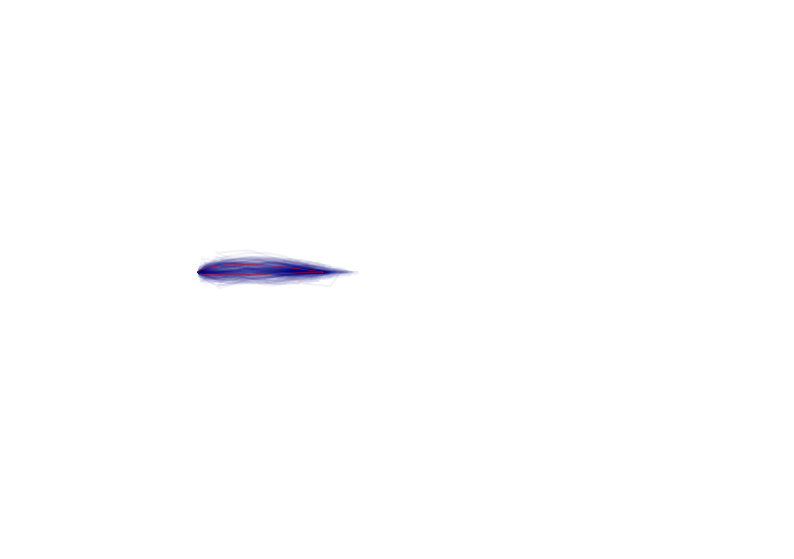

In [61]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
ax.set_xlim(0,1)
ax.set_ylim(-0.5,0.5)
ax.set_zlim(-0.5,0.5)
ax.view_init(elev=0, azim=0)
ax.xaxis.set_visible(False)
ax.zaxis.set_visible(False)

for i in points2:
    # for j in i:
    x1 = i[2,:,0]
    y1 = i[2,:,1]
    z1 = i[2,:,2]
    if np.max(y1)>-0.1:
        continue
    ax.plot3D(x1,y1,z1,c= 'navy',alpha = 0.05)

p = draw_section(mean_mesh.reshape(-1,3),sec_po,'t','pic')
x1 = p[2,:,0]
y1 = p[2,:,1]
z1 = p[2,:,2]
ax.plot3D(x1,y1,z1,c= 'r',alpha = 1,linewidth =0.3)
plt.axis('off')
# plt.savefig(pic_name)
plt.show()


### 做点图

In [29]:
from draw import get_value_center

_,_,mean_v,mean_c = get_value_center(mean_mesh.reshape(-1,3))
g1   = []

tsne = []
for i in points1:

    is_inter,is_water,v,c = get_value_center(i.reshape(-1,3))
    
    c0 = np.sqrt(np.sum(np.power(c-mean_c,2)))
    
    g1.append(np.array([c0,v/mean_v]))

g1 = np.array(g1)

In [ ]:
# 跳过！！！！！！！！！！！！！
gd  = []

err = []
for j,i in enumerate(d1):
    try:
        is_inter,is_water,v,c = get_value_center(i.reshape(-1,3))
    except:
        err.append(j)
        print(j)
        continue

    if v ==-1:
        err.append(j)
        print(j)
        continue
    c0 = np.sqrt(np.sum(np.power(c-mean_c,2)))
    
    gd.append(np.array([c0,v/mean_v]))

gd = np.array(gd)

# np.save('data_base_plot1',gd)

In [ ]:
err = np.array(err)
np.save('g_err',err)
print(gd.shape)
err = np.load('g_err.npy')
d_modified = np.delete(d1,err,0)

In [30]:
# 对于TSNE的降维结果
from ffd_pca import get_tsne
d_modified = np.load(data_root()+ 'mesh_data_test_modified.npy')
d_mesh    = d_modified.reshape(d_modified.shape[0],-1)
ffd_mesh  = points1.reshape(points1.shape[0],-1)
m_mesh    = mean_mesh.reshape(-1)[None,:]

rlt = get_tsne(d_mesh,ffd_mesh,m_mesh)
d_tsne,ffd_tsne,m_tsne = rlt

In [20]:
# np.save(data_root()+ 'mesh_data_test_modified.npy',d_modified)

(1, 2)


In [31]:

g_data = np.concatenate((gd,d_tsne),1)
g_ffd  = np.concatenate((g1,ffd_tsne),1)

mean_plt = np.array([[0,1,m_tsne[0][0],m_tsne[0][1]]])

(512, 4)
(1, 4)


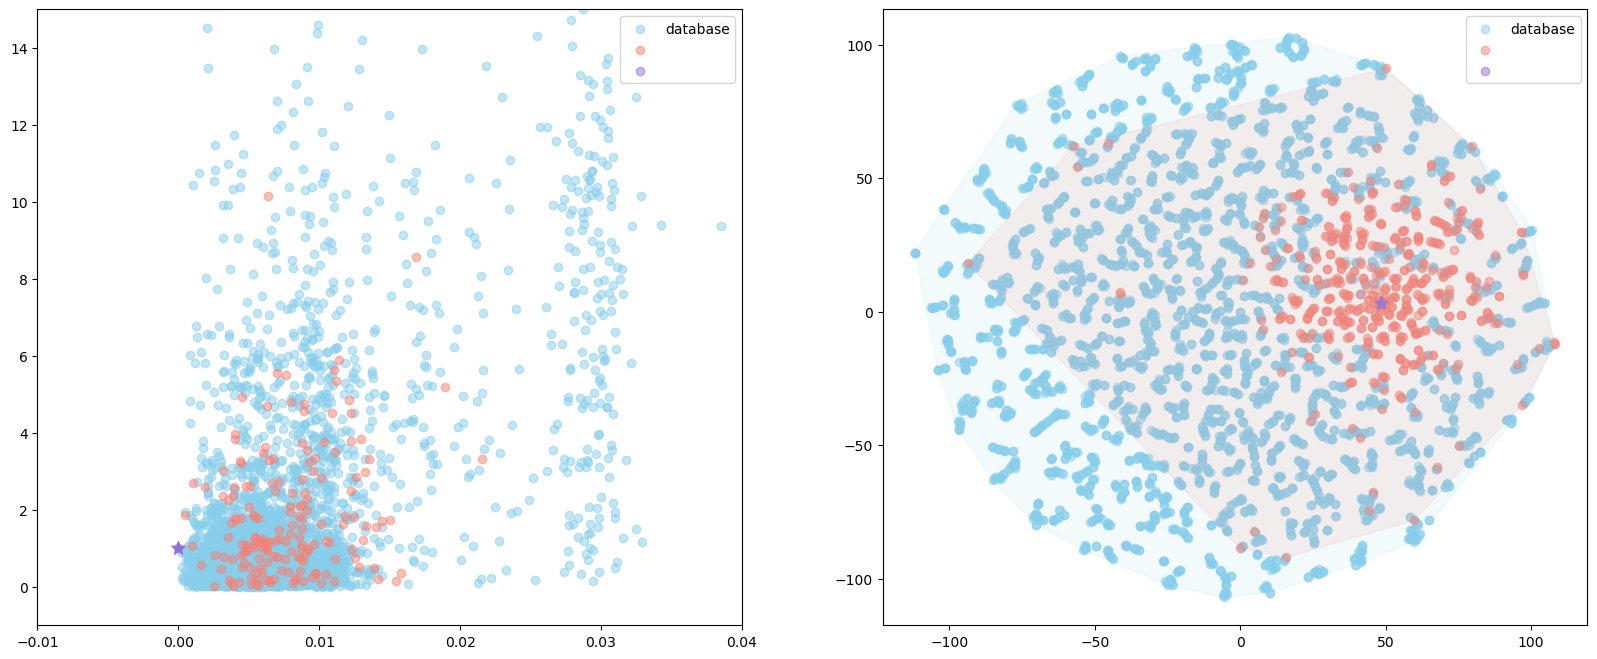

In [32]:
from draw import draw_multi_tsne_distribution

# print(g_data.shape)
print(g_ffd.shape)
print(mean_plt.shape)
draw_multi_tsne_distribution(g_data,1,1,g_ffd,mean_plt)

### 查看FFD扭转压缩特性

In [ ]:
from ffd_pca import ffd_transform1
from draw import get_gif
new_meshs = ffd_transform1(mean_mesh,(3,7,1),0.05)
path = 'ffd_vari/'
for i in range(new_meshs.shape[0]):
    draw_geom_line(new_meshs[i],str(i),path,-25,10)
# for i in range(new_meshs.shape[0]):
#     draw_geom_line(new_meshs[-i],str(21+i),path,-25,10)


In [ ]:
get_gif(path,'a.gif')

In [ ]:
path_base = 'pic/base_foils'
d_modified = np.load(data_root()+'mesh_data_test_modified.npy')
np.random.seed(1234)
tmp = np.random.randint(0,d_modified.shape[0],512)
for j,i in enumerate(tmp):
    mesh = d_modified[i]
    draw_geom_line(mesh,str(j),path_base,-25,10)

In [ ]:
thin_foil = d_modified[tmp[26]]

from ffd_pca import ffd_transform2,draw_plot_point

twist_foil1,twist_points = ffd_transform2(thin_foil,(3,7,1),0)

# easy_draw(twist_foil1)
# a = draw_geom_line(twist_foil1,'thin_foil','ffd_twist',-20,15)
draw_plot_point(twist_foil1,twist_points,'bent_foil','ffd_twist')

In [ ]:
from ffd_pca import ffd_transform3,draw_plot_point
thin_foil = d_modified[tmp[144]]
twist_foil1,twist_points = ffd_transform3(thin_foil,(3,7,1),0.5)

# easy_draw(twist_foil1)
# a = draw_geom_line(twist_foil1,'thin_foil','ffd_twist',-20,15)
draw_plot_point(twist_foil1,twist_points,'flatten_foil1','ffd_twist')

## 查看FFD_PCA方法本身在不同维度的影响


In [ ]:
# 改变固定1,2,3,4维度
from ffd_pca import ffdpca_transform1

path = 'ffd_pca_vari/14/'
upper = 4
lower = upper - 4
new_meshs = ffdpca_transform1(mean_mesh,(3,7,1),upper,lower,0.00,0.1).reshape(21,-1,68,3)
for i in range(new_meshs.shape[0]):
    draw_geom_line(new_meshs[i],str(i),path,-25,10)

In [ ]:
from draw import get_gif
path = 'ffd_pca_vari/14/'

get_gif(path,'b.gif')

##  查看FFD_PCA方法在上述问题中的对比

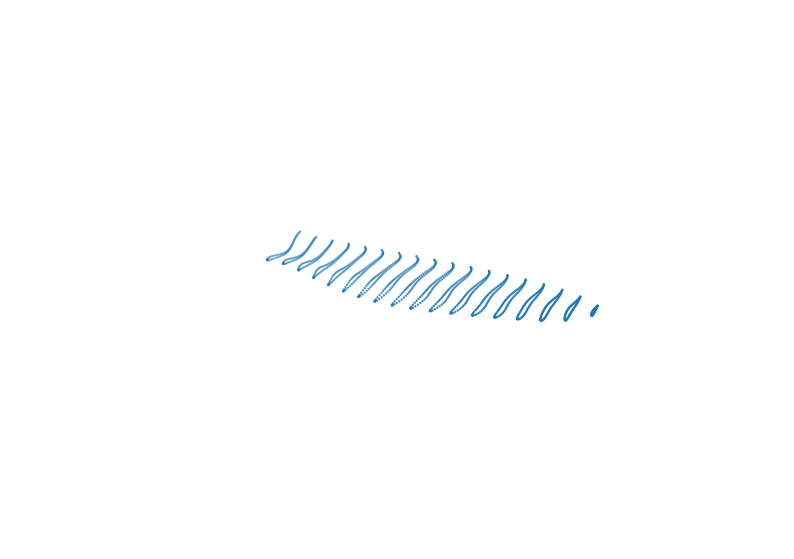

In [5]:
# 改变11-44维度

from ffd_pca import ffdpca_transform0,ffdpca_transform00
from draw import draw_section
new_mesh = ffdpca_transform00(mean_mesh,(3,7,1),0.03,0.0001).reshape(-1,68,3)

easy_draw(new_mesh)

In [6]:
points1 = []
points2 = []

b = 0.05
j = 0
for i in range(512):
    mesh = ffdpca_transform00(mean_mesh,(3,7,1),0.1,b)

    points1.append(mesh)
    

points1 = np.array(points1)
np.save('ffd_pca_mesh',points1)


In [ ]:
path = 'pic/FFDPCA_foils/'
from draw import draw_section
sec_po = [0.2,0.35,0.5,0.65,0.8]

for i in range(100):
    name1 = 'sec_' + str(i)
    name2 = 'vari_' + str(i)

    mesh = ffdpca_transform00(mean_mesh,(3,7,1),0.01)
    p = draw_section(mesh,sec_po,name1,path,-15,20,False,0.2,False)
    p = draw_section(mesh,sec_po,name2,path,0,0,True,0.5)

In [ ]:
from pyDOE import lhs
import matplotlib.image as img
import matplotlib.pyplot as plt
BATCH_SIZE = 100
a = np.array(lhs(1,10) * BATCH_SIZE,dtype=int)[:,0]
a = a.reshape((2,5))
print(a)


fig = plt.figure(figsize=(20,6))

for i in range(5):
    for j in range(2):
        posi = j + i * 2 + 1
      
        ax = fig.add_subplot(2,5,posi)
        
        ax.axis('off')
        name = 'pic/FFDPCA_foils/sec_' + str(a[j,i]) + '.png'
        im   = img.imread(name)
        s = im.shape
        im   = im[s[0]*2//5 :s[0]*3//5 ,s[1]*2//5 :s[1]*3//5,:]
        ax.imshow(im)
plt.savefig('pic/FFDPCA_sec.png')
plt.show()
plt.close()

fig = plt.figure(figsize=(20,6))
for i in range(5):
    for j in range(2):
        posi = j + i * 2 + 1
      
        ax = fig.add_subplot(2,5,posi)
        
        ax.axis('off')
        name = 'pic/FFDPCA_foils/vari_' + str(a[j,i]) + '.png'
        im   = img.imread(name)
        s = im.shape
        im   = im[s[0]*2//5 :s[0]*3//5 ,s[1]*1//5 :s[1]*4//5,:]
        ax.imshow(im)
plt.savefig('pic/FFDPCA_vari.png')
plt.show()
plt.close()

In [111]:
points1 = []
points2 = []
sec_po = [0.2,0.35,0.5,0.65,0.8]
from draw import get_value_center
b = 0.03
j = 0
for i in range(512):
    print(i)
    mesh = ffdpca_transform00(mean_mesh,(3,7,1),0.03,b)
    p = draw_section(mesh,sec_po,'t','pic')
    
    points1.append(mesh)
    points2.append(p)
    
    is_inter,is_water,v,c = get_value_center(mesh) 
    if  is_inter or  not is_water:
        j+=1
print(j)
points1 = np.array(points1)
np.save('ffd_pca_mesh',points1)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [112]:

ffd_sec = np.load('ffd_sec.npy')

ffd_find_sec = np.max(ffd_sec[:,2,:,2],1)
ffd_max = np.argmax(ffd_find_sec)
ffd_max = 10
ffd_max_sec = ffd_sec[ffd_max,2,:,:]

ffd_find_sec = np.min(np.abs(ffd_sec[:,2,:,2]),1)
ffd_max = np.argmin(ffd_find_sec)
ffd_min_sec = ffd_sec[ffd_max,2,:,:]

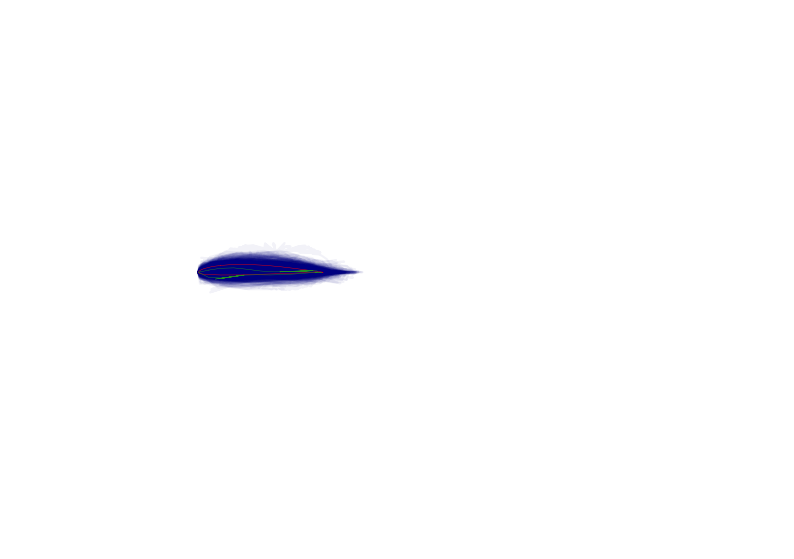

In [113]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection="3d")
ax.set_xlim(0,1)
ax.set_ylim(-0.5,0.5)
ax.set_zlim(-0.5,0.5)
ax.view_init(elev=0, azim=0)
ax.xaxis.set_visible(False)
ax.zaxis.set_visible(False)

for i in points2:
    # for j in i:
    x1 = i[2,:,0]
    y1 = i[2,:,1]
    z1 = i[2,:,2]
    if np.max(y1)>-0.1:
        continue
    ax.plot3D(x1,y1,z1,c= 'navy',alpha = 0.05)


p = draw_section(mean_mesh.reshape(-1,3),sec_po,'t','pic')
x1 = p[2,:,0]
y1 = p[2,:,1]
z1 = p[2,:,2]
ax.plot3D(x1,y1,z1,c= 'r',alpha = 1,linewidth =0.3)

x1 = ffd_max_sec[:,0]
y1 = ffd_max_sec[:,1]
z1 = ffd_max_sec[:,2]
ax.plot3D(x1,y1,z1,c= 'forestgreen',alpha = 1,linewidth =0.3)
# x1 = ffd_min_sec[:,0]
# y1 = ffd_min_sec[:,1]
# z1 = ffd_min_sec[:,2]
# ax.plot3D(x1,y1,z1,c= 'light_green',alpha = 1,linewidth =0.3)



plt.axis('off')
# plt.savefig(pic_name)
plt.show()

In [114]:
g1 = []
_,_,mean_v,mean_c = get_value_center(mean_mesh.reshape(-1,3))
d_modified = np.load(data_root()+'mesh_data_test_modified.npy')

from ffd_pca import get_tsne
for i in points1:

    is_inter,is_water,v,c = get_value_center(i.reshape(-1,3))
    
    c0 = np.sqrt(np.sum(np.power(c-mean_c,2)))
    
    g1.append(np.array([c0,v/mean_v]))


ffd_points = np.load('ffd_mesh.npy')
ffd_g1 = []
for i in ffd_points:

    is_inter,is_water,v,c = get_value_center(i.reshape(-1,3))
    
    c0 = np.sqrt(np.sum(np.power(c-mean_c,2)))
    
    ffd_g1.append(np.array([c0,v/mean_v]))

g1 = np.array(g1)
ffd_g1 = np.array(ffd_g1)

d_mesh       = d_modified.reshape(d_modified.shape[0],-1)
ffdpca_mesh  = points1.reshape(points1.shape[0],-1)
ffd_mesh     = ffd_points.reshape(ffd_points.shape[0],-1)
m_mesh       = mean_mesh.reshape(-1)[None,:]

rlt = get_tsne(d_mesh,ffdpca_mesh,ffd_mesh,m_mesh)
d_tsne,ffdpca_tsne,ffd_tsne,m_tsne = rlt

In [115]:
gd = np.load('data_base_plot1.npy')
g_data = np.concatenate((gd,d_tsne),1)
g_ffdpca  = np.concatenate((g1,ffdpca_tsne),1)
g_ffd  = np.concatenate((ffd_g1,ffd_tsne),1)
mean_plt = np.array([[0,1,m_tsne[0][0],m_tsne[0][1]]])

In [116]:
tmp = np.argwhere(g_ffdpca[:,1]<-5000)[:,0]
tmp1 = np.argwhere(g_ffd[:,1]<-5000)[:,0]
g_ffd0 = np.delete(g_ffd , tmp1 ,0)
g_ffdpca0 = np.delete(g_ffdpca , tmp ,0) 
print(np.mean(g_ffdpca0[:,1]),np.mean(g_ffd0[:,1]))

2.030120683515395 1.8404613238444625


(173, 4)
(92, 4)


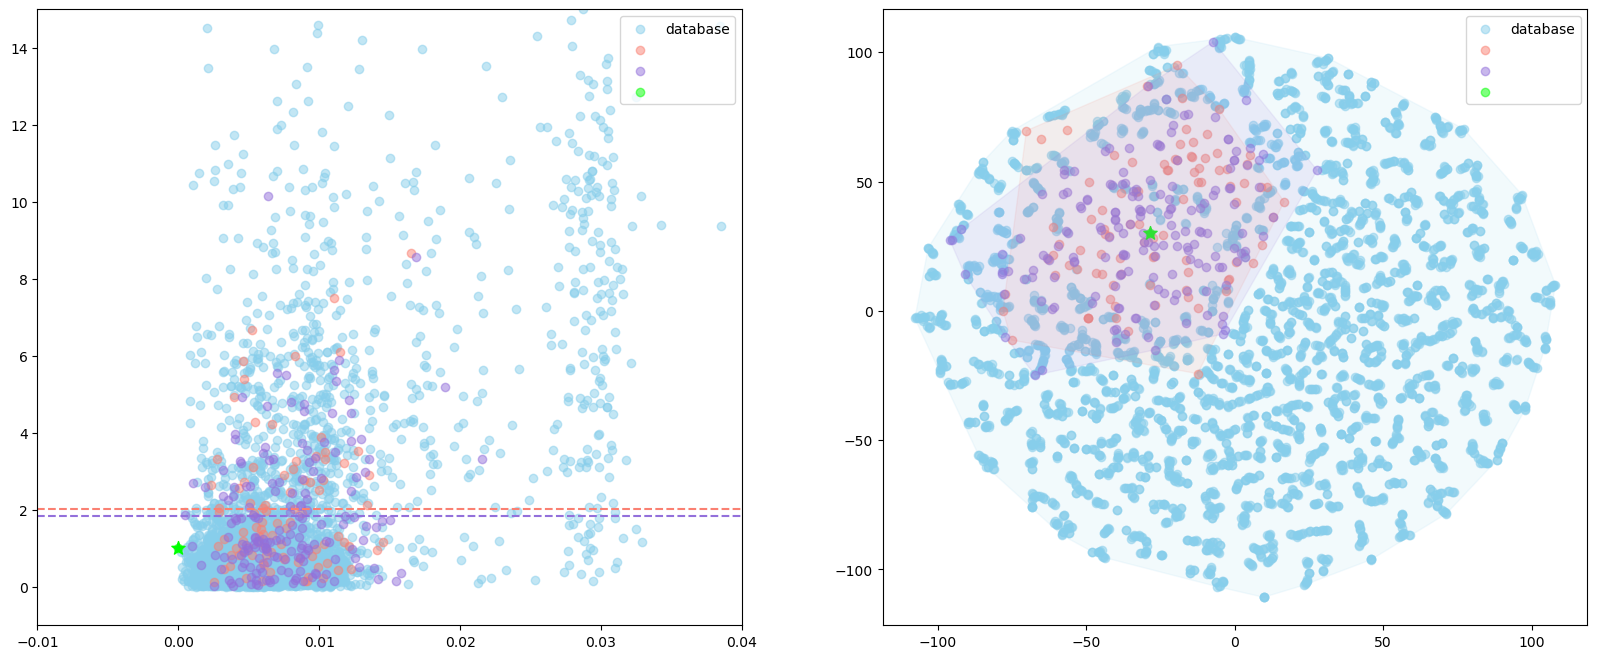

In [117]:
from draw import draw_multi_tsne_distribution

# print(g_data.shape)
print(g_ffd0.shape)
print(g_ffdpca0.shape)
draw_multi_tsne_distribution(g_data,1,1,g_ffdpca0,g_ffd0,mean_plt)